# WeatherPy
-------------------

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import math
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
cloudiness, new_cities, country, date, humidity, lat, lng, max_temp, wind_speed = \
    [], [], [], [], [], [], [], [], []
print("Beginning Data Retrieval")
print("----------------------------------------------")
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 1
record = 1

for city in cities:
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url).json()
    try:
        if record <= 50:
            print(f"Processing Record {record} of Set {count} | {city}")
            record += 1
        else:
            record = 1
            count += 1 
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response['main']['humidity'])
        lng.append(weather_response['coord']['lon'])
        lat.append(weather_response['coord']['lat'])
        wind_speed.append(weather_response["wind"]["speed"])
        max_temp.append(weather_response['main']['temp_max'])
        new_cities.append(city)
    except:
        print(f"City not found. Skipping...")
        pass
    

Beginning Data Retrieval
----------------------------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | amderma
City not found. Skipping...
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | balikpapan
Processing Record 7 of Set 1 | saint-denis
Processing Record 8 of Set 1 | saleaula
City not found. Skipping...
Processing Record 9 of Set 1 | hambantota
Processing Record 10 of Set 1 | jibuti
Processing Record 11 of Set 1 | varna
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | saint-imier
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | inhambane
Processing Record 16 of Set 1 | vila velha
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | pangai
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | yar-sale
Processing Record 21 of

Processing Record 39 of Set 4 | samusu
City not found. Skipping...
Processing Record 40 of Set 4 | taburao
City not found. Skipping...
Processing Record 41 of Set 4 | bautzen
Processing Record 42 of Set 4 | bourges
Processing Record 43 of Set 4 | vestmanna
Processing Record 44 of Set 4 | yago
Processing Record 45 of Set 4 | sarakhs
Processing Record 46 of Set 4 | mananjary
Processing Record 47 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | chara
Processing Record 50 of Set 4 | gornopravdinsk
Processing Record 1 of Set 5 | dakar
Processing Record 2 of Set 5 | sabana grande de boya
Processing Record 3 of Set 5 | bay city
Processing Record 4 of Set 5 | tilichiki
Processing Record 5 of Set 5 | oussouye
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | lac du bonnet
Processing Record 8 of Set 5 | cayenne
Processing Record 9 of Set 5 | pevek
Processing Record 10 of Se

Processing Record 30 of Set 8 | solwezi
Processing Record 31 of Set 8 | yarovoye
Processing Record 32 of Set 8 | lavrentiya
Processing Record 33 of Set 8 | naze
Processing Record 34 of Set 8 | noumea
Processing Record 35 of Set 8 | shenjiamen
Processing Record 36 of Set 8 | jadu
Processing Record 37 of Set 8 | la ronge
Processing Record 38 of Set 8 | broome
Processing Record 39 of Set 8 | araouane
Processing Record 40 of Set 8 | coihaique
Processing Record 41 of Set 8 | sortavala
Processing Record 42 of Set 8 | hvide sande
Processing Record 43 of Set 8 | galesong
Processing Record 44 of Set 8 | huanren
Processing Record 45 of Set 8 | belmonte
Processing Record 46 of Set 8 | port-gentil
Processing Record 47 of Set 8 | houma
Processing Record 48 of Set 8 | aklavik
Processing Record 49 of Set 8 | pimenta bueno
Processing Record 50 of Set 8 | boffa
Processing Record 1 of Set 9 | taga
Processing Record 2 of Set 9 | laguna
Processing Record 3 of Set 9 | litoral del san juan
City not found. S

Processing Record 21 of Set 12 | lagoa
Processing Record 22 of Set 12 | tahoua
Processing Record 23 of Set 12 | paredon
Processing Record 24 of Set 12 | tianpeng
Processing Record 25 of Set 12 | college
Processing Record 26 of Set 12 | praia da vitoria
Processing Record 27 of Set 12 | sri aman
Processing Record 28 of Set 12 | artesia
Processing Record 29 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 30 of Set 12 | banepa
Processing Record 31 of Set 12 | hurricane
Processing Record 32 of Set 12 | buraydah
Processing Record 33 of Set 12 | fuxin
Processing Record 34 of Set 12 | madang
Processing Record 35 of Set 12 | san lorenzo
Processing Record 36 of Set 12 | kenai
Processing Record 37 of Set 12 | aketi
Processing Record 38 of Set 12 | ormiston
Processing Record 39 of Set 12 | omboue
Processing Record 40 of Set 12 | yershov
Processing Record 41 of Set 12 | lazaro cardenas
Processing Record 42 of Set 12 | pasinler
Processing Record 43 of Set 12 | cumana
Processin

In [39]:
# Display the length of the querries
print(f"Cloudiness:  {len(cloudiness)}")
print(f"New_cities:  {len(new_cities)}")
print(f"Country:     {len(country)}")
print(f"Date:        {len(date)}")
print(f"Humidity:    {len(humidity)}")
print(f"Lat:         {len(lat)}")
print(f"Lng:         {len(lng)}")
print(f"Max_temp:    {len(max_temp)}")
print(f"Wind_speed:  {len(wind_speed)}")


Cloudiness:  579
New_cities:  579
Country:     579
Date:        579
Humidity:    579
Lat:         579
Lng:         579
Max_temp:    579
Wind_speed:  579


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
weather_dict = {
    "City": new_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("Output/weather_data.csv", encoding="utf-8", index=False)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,90,RE,1580008370,83,-21.36,55.77,75.20,6.93
1,punta arenas,75,CL,1580008363,70,-53.15,-70.92,48.20,25.28
2,bredasdorp,68,ZA,1580008363,87,-34.53,20.04,59.00,13.87
3,atuona,74,PF,1580008374,77,-9.80,-139.03,80.74,13.80
4,balikpapan,40,ID,1580008846,83,-1.27,116.83,84.20,4.70


### Plotting the Data  and saving the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

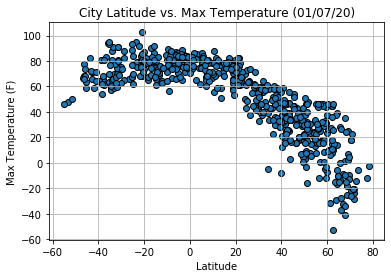

In [41]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (01/07/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

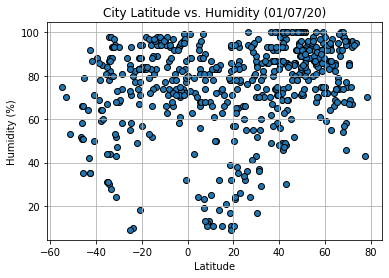

In [42]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Humidity (01/07/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Latitude vs.Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

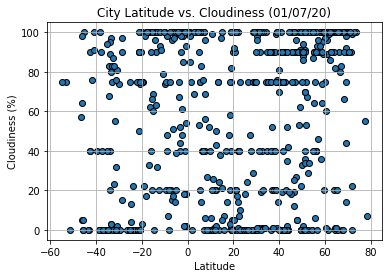

In [43]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (01/07/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Latitude vs.Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

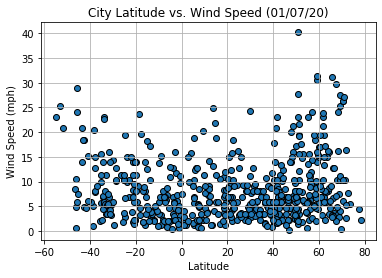

In [44]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (01/07/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Latitude vs.Wind Speed Plot.png")
plt.show()

## Linear Regression

In [45]:
# Create a function to create Linear Regression plots
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"Images/{ifig}.png")
    plt.show()

In [46]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_data.loc[weather_data["Lat"] >= 0.0]
#northern.reset_index(inplace=True)

southern = weather_data.loc[weather_data["Lat"] < 0.0]
#southern.reset_index(inplace=True)
northern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
5,saint-denis,62,FR,1580008846,93,48.92,2.33,41.00,3.36
6,hambantota,40,LK,1580008677,88,6.12,81.12,77.00,12.75
7,jibuti,1,DJ,1580008450,61,11.50,42.50,82.40,7.20
8,varna,2,BG,1580008585,64,43.22,27.92,39.00,2.24
10,saint-imier,27,CH,1580008847,92,47.15,7.00,35.01,0.20


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8552888799454876


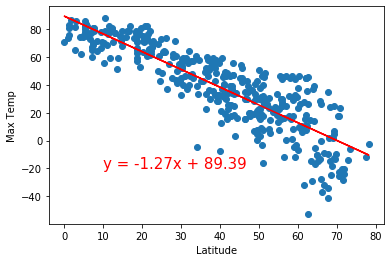

In [47]:
xdata = northern["Lat"]
ydata = northern["Max Temp"]
xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (10,-20)
ifig = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3809341042356518


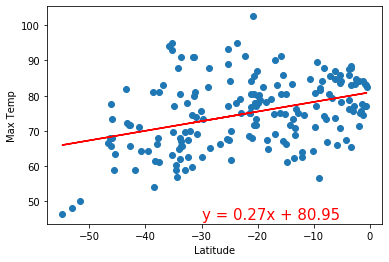

In [48]:
xdata = southern["Lat"]
ydata = southern["Max Temp"]
xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (-30,45)
ifig = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3728394260132853


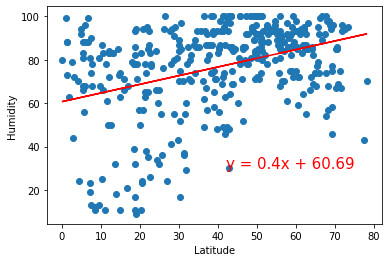

In [49]:
xdata = northern["Lat"]
ydata = northern["Humidity"]
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (42,30)
ifig = "Northern Hemisphere - Humidity vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.336084251217201


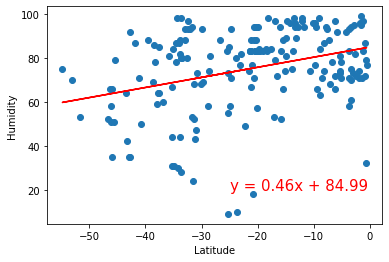

In [50]:
xdata = southern["Lat"]
ydata = southern["Humidity"]
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (-25,20)
ifig = "Southern Hemisphere - Humidity vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24313525721788265


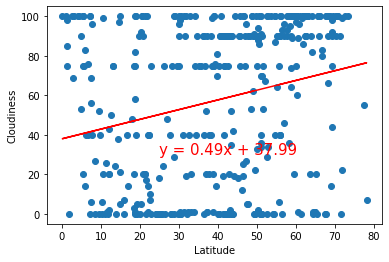

In [51]:
xdata = northern["Lat"]
ydata = northern["Cloudiness"]
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (25,30)
ifig = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2610421306749868


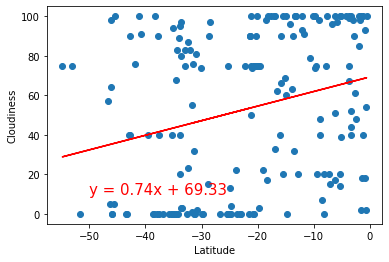

In [52]:
xdata = southern["Lat"]
ydata = southern["Cloudiness"]
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (-50,10)
ifig = "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.23992597468051133


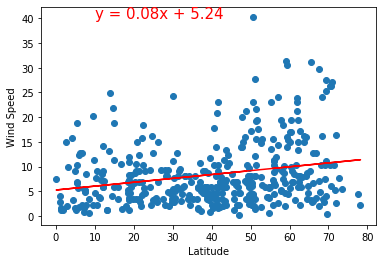

In [53]:
xdata = northern["Lat"]
ydata = northern["Wind Speed"]
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (10,40)
ifig = "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3810006778646516


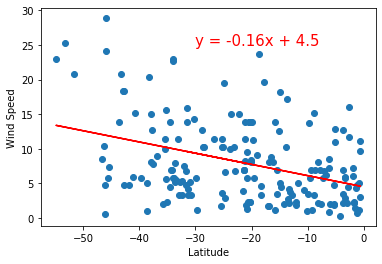

In [54]:
xdata = southern["Lat"]
ydata = southern["Wind Speed"]
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (-30,25)
ifig = "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

## Observations

1. As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases
2. It seems that humidity and latitude are fairly correlated
3. Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic regions